<a href="https://colab.research.google.com/github/HafidzNDP/Python-Basic/blob/main/Unsupervised_ML_Module_Day_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Unsupervised ML Notebook**
this notebook is for understanding the python unsupervised ML

last update: 2021-06-17

by: Hafidz NDP

## What You Need to Do
1. Open this gdrive folder:  https://drive.google.com/drive/folders/1sjyZNq_iFOCGmA0BWsg823zW5KyEOztd?usp=sharing
2. Create folder in there with format: {your_name}_day25
3. Create Google Colab file in that folder



## *Content*
- PCA
- K-Means Clustering

# **Unsupervised  Quick Introduction**
**Unsupervised Learning** is a machine learning technique in which the users do not need to supervise the model. Instead, it allows the model to work on its own to discover patterns and information that was previously undetected.

![](https://drive.google.com/uc?export=view&id=1BWd4oN2HfQIQh2j5pD560xgLwfMGK0gU)

In [ ]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition
import sklearn.cluster as cluster

In [ ]:
# install library
!pip install scikit-plot

In [ ]:
# import graph library
import matplotlib.pyplot as plt
import scikitplot as skplt

# **Reading the data**
For this unsupervised learning, we will use the same dataset with classification: **breast cancer data**

In [ ]:
# see the breast cancer data
breast_cancer_raw_data = datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_raw_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# check data description
breast_cancer_description_data = breast_cancer_raw_data['DESCR']

In [ ]:
print(breast_cancer_description_data)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# check column name
breast_cancer_column_name = breast_cancer_raw_data['feature_names']

In [ ]:
print(breast_cancer_column_name)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# check target data
breast_cancer_target_data = breast_cancer_raw_data['target']

In [ ]:
print(breast_cancer_target_data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
# check target name
breast_cancer_target_name = breast_cancer_raw_data['target_names']

In [ ]:
print(breast_cancer_target_name)

['malignant' 'benign']


In [ ]:
# check value data
breast_cancer_value_data = breast_cancer_raw_data['data']

In [ ]:
print(breast_cancer_value_data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


# **Exploratory Data Analysis**

In [ ]:
# merge value data and target data - check data type and shape
print('data type value:',type(breast_cancer_value_data))
print('shape value:',breast_cancer_value_data.shape)
print('\n')
print('data type target:',type(breast_cancer_target_data))
print('shape target:',breast_cancer_target_data.shape)

data type value: <class 'numpy.ndarray'>
shape value: (569, 30)


data type target: <class 'numpy.ndarray'>
shape target: (569,)


In [ ]:
# merge value data and target data - reshape target data
breast_cancer_target_data = breast_cancer_target_data.reshape(-1,1)
print('shape target after reshape:',breast_cancer_target_data.shape)

shape target after reshape: (569, 1)


In [ ]:
# merge value data and target data - final
breast_cancer_merge_data = np.hstack((breast_cancer_value_data,breast_cancer_target_data))
print(breast_cancer_merge_data)

[[1.799e+01 1.038e+01 1.228e+02 ... 4.601e-01 1.189e-01 0.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 ... 2.750e-01 8.902e-02 0.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 ... 3.613e-01 8.758e-02 0.000e+00]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 2.218e-01 7.820e-02 0.000e+00]
 [2.060e+01 2.933e+01 1.401e+02 ... 4.087e-01 1.240e-01 0.000e+00]
 [7.760e+00 2.454e+01 4.792e+01 ... 2.871e-01 7.039e-02 1.000e+00]]


In [ ]:
# read the data as dataframe
df = pd.DataFrame(breast_cancer_merge_data,columns=breast_cancer_column_name.tolist()+['is_cancer'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(569, 31)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'is_cancer'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# assign variable for column in numeric type
numeric_column = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [ ]:
# check simple statistic of the numeric value
df[numeric_column].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_cancer


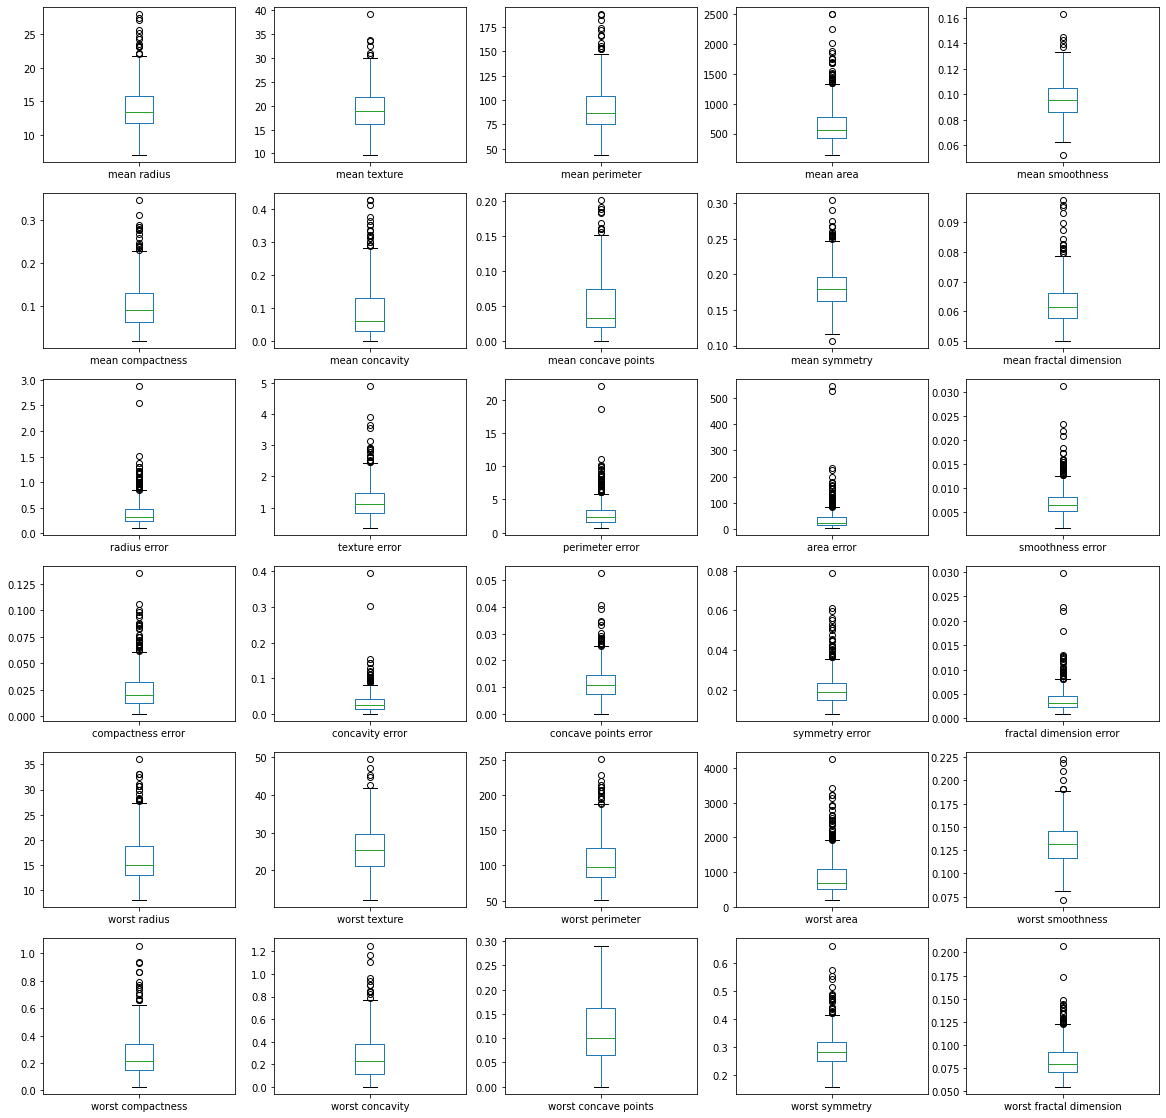

In [ ]:
# check outlier using boxplot
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,20))

for i,el in enumerate(numeric_column):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)

plt.show()

In [ ]:
# get IQR for each numeric column
Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 mean radius                 11.700000
mean texture                16.170000
mean perimeter              75.170000
mean area                  420.300000
mean smoothness              0.086370
mean compactness             0.064920
mean concavity               0.029560
mean concave points          0.020310
mean symmetry                0.161900
mean fractal dimension       0.057700
radius error                 0.232400
texture error                0.833900
perimeter error              1.606000
area error                  17.850000
smoothness error             0.005169
compactness error            0.013080
concavity error              0.015090
concave points error         0.007638
symmetry error               0.015160
fractal dimension error      0.002248
worst radius                13.010000
worst texture               21.080000
worst perimeter             84.110000
worst area                 515.300000
worst smoothness             0.116600
worst compactness            0.147200
worst c

In [ ]:
# remove outlier
non_outlier_df = df.copy()
for x in numeric_column:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [ ]:
non_outlier_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_cancer
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0.0
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0.0
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0.0
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.040610,0.02791,0.012820,0.02008,0.004144,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0.0
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0.0


In [ ]:
non_outlier_df.shape

(398, 31)

In [ ]:
final_feature_column = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error']
target_column = ['is_cancer']
final_column = final_feature_column+target_column

In [ ]:
# standardize the data
scaler = preprocessing.StandardScaler()
final_df = non_outlier_df[final_column].copy()
final_df = pd.DataFrame(scaler.fit_transform(final_df[final_feature_column]),columns=final_feature_column)
final_df['is_cancer'] = non_outlier_df['is_cancer'].to_numpy()

In [ ]:
final_df.shape

(398, 20)

In [ ]:
final_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,is_cancer
0,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.488638,0.277054,-0.756789,1.096726,-0.767777,1.151088,1.763687,-1.041488,-0.553004,-0.097701,0.118967,-0.938850,-0.627520,0.0
1,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.935739,2.210386,2.655183,2.167679,0.684948,1.909090,1.573780,1.211921,0.998964,0.057374,1.133301,-0.716578,1.850387,0.0
2,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.104415,-1.002217,-0.846630,0.570644,0.227813,0.350476,0.901060,-1.184490,-0.981844,-0.861810,-0.575194,-0.765972,0.033919,0.0
3,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,1.178389,0.507899,-0.077988,1.559397,-0.258433,1.581669,1.779781,-0.310422,1.971417,0.258176,0.721616,0.275099,0.878539,0.0
4,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.693088,0.531946,-1.563363,0.756965,-0.034437,0.840486,0.648065,1.695619,1.090367,1.755910,2.482440,2.123568,0.003262,0.0
5,0.525514,0.415777,0.495632,0.511907,0.447993,-0.408185,0.652061,-0.723278,-0.397423,1.300270,0.355330,1.167907,1.215854,-0.337016,-0.760310,-0.267356,0.292570,-0.860960,-0.699566,0.0
6,1.109961,0.556578,1.289904,1.025377,1.969026,3.318703,2.613973,2.056489,2.465518,2.055730,-0.046467,1.906847,1.781068,0.319288,0.501430,0.521274,0.758816,-0.330926,0.877006,0.0
7,0.066019,-1.061350,0.062824,-0.019083,0.374970,-0.142265,0.465286,0.714699,-0.708873,-0.287371,-0.730725,-0.107016,-0.190099,1.039817,-0.479504,-0.009560,0.803457,0.221905,-0.534781,1.0
8,-0.119392,-0.715749,-0.045972,-0.227077,1.180711,1.166153,-0.187643,1.109060,1.377441,-0.950453,-0.829129,-0.863897,-0.762394,-1.150371,-0.066777,-0.466170,-0.848246,-0.351823,-0.438976,1.0
9,-1.560757,-1.552872,-1.549501,-1.332632,0.757510,-0.610845,-0.591669,0.378049,1.565109,-0.229439,-0.277922,-0.274091,-0.696088,1.613831,-0.505889,-0.275971,1.066341,0.311194,-0.022797,1.0


In [ ]:
# prepare the data to numpy array
final_feature_array = final_df[final_feature_column].to_numpy()
target_array = final_df[target_column].to_numpy()

In [ ]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (398, 19)
shape of target: (398, 1)


# **PCA**

![image.png]()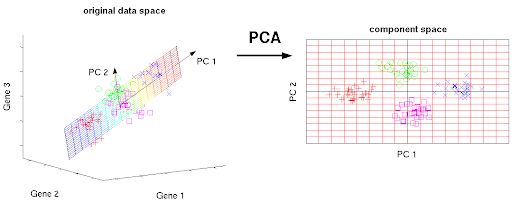

In [ ]:
# load the algorithm
pca_model = decomposition.PCA(n_components=2)

In [ ]:
# train the data and transform
pca_feature_array = pca_model.fit_transform(final_feature_array)

In [ ]:
# check the shape of the result
pca_feature_array.shape

(398, 2)

In [ ]:
# add new name for the new column
pca_column = ['pca column 1','pca column 2']

In [ ]:
# transform to dataframe
pca_feature_df = pd.DataFrame(pca_feature_array,columns=pca_column)
pca_feature_df['is_cancer'] = target_array

In [ ]:
# check the resulted data
pca_feature_df.head(5)

,pca column 1,pca column 2,is_cancer
0,3.367265,-3.472116,0.0
1,4.533983,3.012485,0.0
2,0.403454,-2.927444,0.0
3,4.006280,-0.137489,0.0
4,3.470722,0.335837,0.0


In [ ]:
# check the explained variance
print('explained variance:',pca_model.explained_variance_ratio_)

explained variance: [0.38108349 0.21797643]


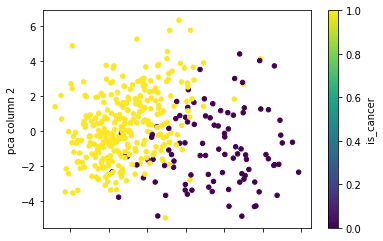

In [ ]:
# show in 2D plot
pca_feature_df.plot.scatter(x='pca column 1',y='pca column 2',c='is_cancer',colormap='viridis')

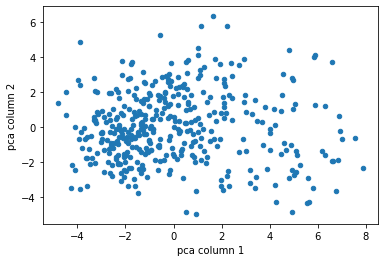

In [ ]:
# show in 2D plot
pca_feature_df.plot.scatter(x='pca column 1',y='pca column 2')

In [ ]:
# check explained variance for each number of component
for x in range(1,len(final_feature_column)+1):
  pca_model_x = decomposition.PCA(n_components=x)
  pca_feature_array_x = pca_model_x.fit_transform(final_feature_array)
  print('explained variance for {} column: {}'.format(x,np.sum(pca_model_x.explained_variance_ratio_)))

explained variance for 1 column: 0.3810834873083292
explained variance for 2 column: 0.5990599216146028
explained variance for 3 column: 0.7046797832990307
explained variance for 4 column: 0.7821175317513346
explained variance for 5 column: 0.8346727797091227
explained variance for 6 column: 0.8745481141867044
explained variance for 7 column: 0.9071329541415311
explained variance for 8 column: 0.9286360382632614
explained variance for 9 column: 0.9486818638644995
explained variance for 10 column: 0.9646296089232673
explained variance for 11 column: 0.9755804768852196
explained variance for 12 column: 0.9832232944899307
explained variance for 13 column: 0.9904272447850684
explained variance for 14 column: 0.9945876054752064
explained variance for 15 column: 0.9969704377322012
explained variance for 16 column: 0.9989909469385947
explained variance for 17 column: 0.9997299088691797
explained variance for 18 column: 0.9999916503094293
explained variance for 19 column: 1.0000000000000002


# **Clustering**

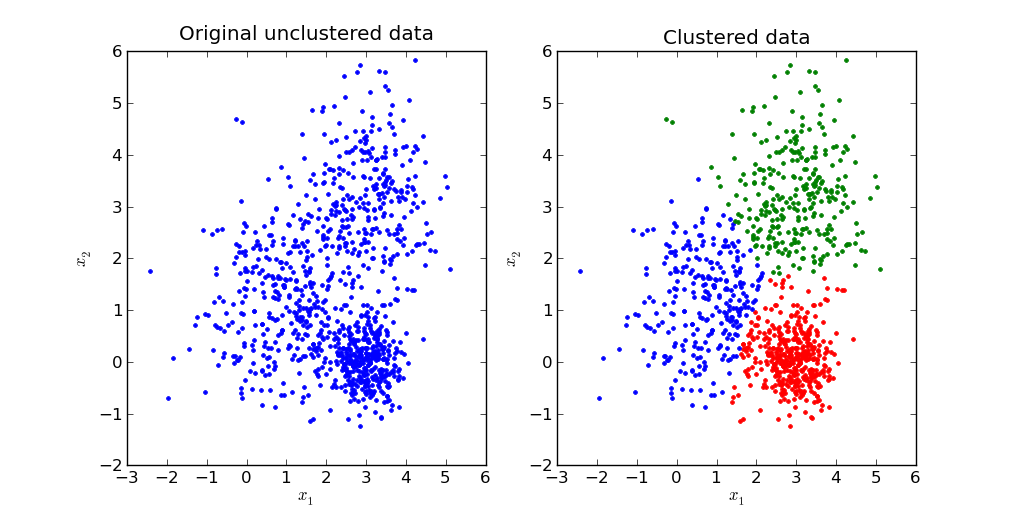

In [ ]:
# load the algorithm
cluster_model = cluster.KMeans(n_clusters=2)

In [ ]:
# train the data
cluster_array = cluster_model.fit(final_feature_array)

In [ ]:
# label result
cluster_label = cluster_model.labels_

In [ ]:
cluster_label

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
# add label to final dataframe
final_df['cluster'] = cluster_label

In [ ]:
# check the resulted data
final_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,is_cancer,cluster
0,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.488638,0.277054,-0.756789,1.096726,-0.767777,1.151088,1.763687,-1.041488,-0.553004,-0.097701,0.118967,-0.938850,-0.627520,0.0,1
1,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.935739,2.210386,2.655183,2.167679,0.684948,1.909090,1.573780,1.211921,0.998964,0.057374,1.133301,-0.716578,1.850387,0.0,1
2,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.104415,-1.002217,-0.846630,0.570644,0.227813,0.350476,0.901060,-1.184490,-0.981844,-0.861810,-0.575194,-0.765972,0.033919,0.0,0
3,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,1.178389,0.507899,-0.077988,1.559397,-0.258433,1.581669,1.779781,-0.310422,1.971417,0.258176,0.721616,0.275099,0.878539,0.0,1
4,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.693088,0.531946,-1.563363,0.756965,-0.034437,0.840486,0.648065,1.695619,1.090367,1.755910,2.482440,2.123568,0.003262,0.0,1


In [ ]:
# check using elbow method to define the best cluster [numbers]
for x in range(1, 30):
  cluster_model = cluster.KMeans(n_clusters=x)
  cluster_array = cluster_model.fit(final_feature_array)
  print(cluster_model.inertia_)

7562.000000000001
5581.746651048403
4706.337435676232
4279.884848700728
3972.993774896375
3767.0356998273155
3533.290186157607
3408.695143619701
3270.253665594451
3174.0209637801736
3088.776271651202
3024.6545190124307
2940.831834643088
2883.4564557853782
2811.7034947967304
2746.627357258945
2714.4700198604532
2633.1791244602464
2588.8585087387064
2574.7526028806087
2526.611732359141
2488.600802469379
2440.353951675852
2397.365297808963
2393.2264682991263
2327.1468904300027
2313.582217009267
2282.4705345685975
2236.9137949676415


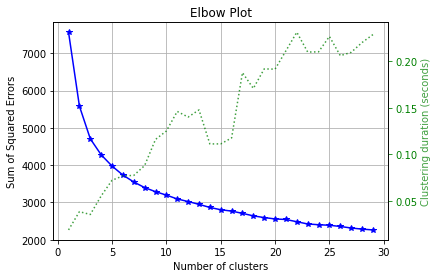

In [ ]:
# check using elbow method to define the best cluster [graph]
skplt.cluster.plot_elbow_curve(cluster_model, final_feature_array, cluster_ranges=range(1, 30))
plt.show()

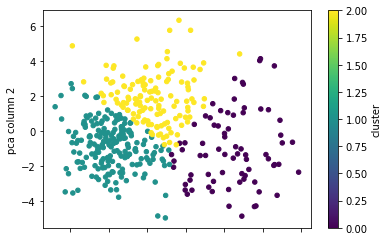

In [ ]:
# plot using PCA using the best cluster
best_cluster_model = cluster.KMeans(n_clusters=3)
best_cluster_array = best_cluster_model.fit(final_feature_array)
best_cluster_label = best_cluster_model.labels_
pca_feature_df = pd.DataFrame(pca_feature_array,columns=pca_column)
pca_feature_df['cluster'] = best_cluster_label
pca_feature_df.plot.scatter(x='pca column 1',y='pca column 2',c='cluster',colormap='viridis')

## Unsupervised Task
Do clustering using student_grade_prediction data that are explained here: https://www.kaggle.com/dipam7/student-grade-prediction to see if there is any student segment

# Assignment Unsupervised
Do the PCA then clustering then classification for each cluster using the data here: https://www.kaggle.com/adityakadiwal/water-potability

In [ ]:
### data